## Dependencies

In [1]:
!pip install torch==2.1.1

  Using cached torch-2.1.1-cp39-cp39-win_amd64.whl (192.2 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1
    Uninstalling torch-2.2.1:
      Successfully uninstalled torch-2.2.1
  Rolling back uninstall of torch
  Moving to c:\users\moise niyonkuru\anaconda3\lib\site-packages\functorch\
   from C:\Users\Moise Niyonkuru\anaconda3\Lib\site-packages\~unctorch
  Moving to c:\users\moise niyonkuru\anaconda3\lib\site-packages\torch-2.2.1.dist-info\
   from C:\Users\Moise Niyonkuru\anaconda3\Lib\site-packages\~orch-2.2.1.dist-info
  Moving to c:\users\moise niyonkuru\anaconda3\lib\site-packages\torch\
   from C:\Users\Moise Niyonkuru\anaconda3\Lib\site-packages\~-rch
  Moving to c:\users\moise niyonkuru\anaconda3\lib\site-packages\torchgen\
   from C:\Users\Moise Niyonkuru\anaconda3\Lib\site-packages\~-rchgen
  Moving to c:\users\moise niyonkuru\anaconda3\scripts\convert-caffe2-to-onnx.exe
   from C:\Users\Moise Niyonkuru\AppData\Local\Temp\pip-uninstall-f9n27u

ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [2]:
!pip install torchvision

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import os                       # for working with files
from PIL import Image
import numpy as np
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images

In [4]:
# Verify if torch is installed
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.2.1+cpu
False


#  Explore the dataset

###  Load the dataset

In [5]:
# data_dir = './Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented'
data_dir = './archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/'
train_dir = data_dir + 'train'
test_dir = data_dir + 'valid'
data = os.listdir(train_dir)
diseases = []
for crop in data:
    diseases.append(crop)
    # if os.path.isdir(data_dir+'/'+crop):
    #     diseases.append(os.listdir(data_dir+'/'+crop))
diseases

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [6]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


### Visualize images available for our datasets

In [7]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class 

,no. of images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816
Cherry_(including_sour)___healthy,1826
Cherry_(including_sour)___Powdery_mildew,1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Corn_(maize)___Common_rust_,1907
Corn_(maize)___healthy,1859


Text(0.5, 1.0, 'Images per each class of plant disease')

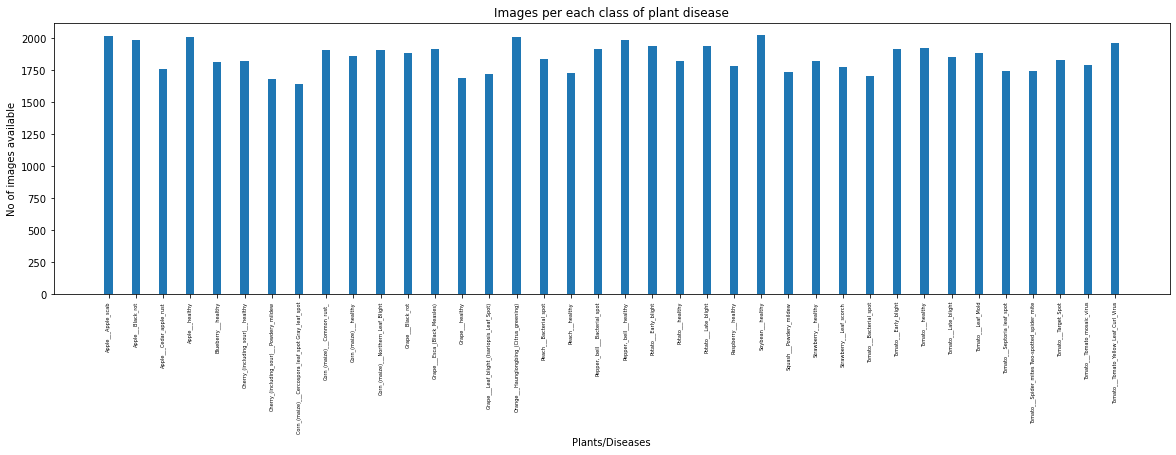

In [8]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [9]:
# Images available for training
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


## Data Preparation for training 

In [34]:
# datasets for validation and training
train = ImageFolder(train_dir, transform = transforms.ToTensor())
valid = ImageFolder(test_dir, transform = transforms.ToTensor())

In [25]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [19]:
# Display classes in train set
print('Train classes:',len(train.classes ))

Train classes: 38


In [20]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple___Apple_scab(0)


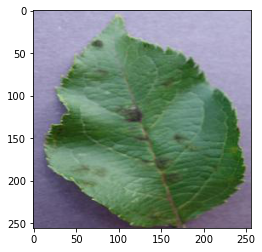

In [26]:
show_image(*train[0])

Label :Apple___healthy(3)


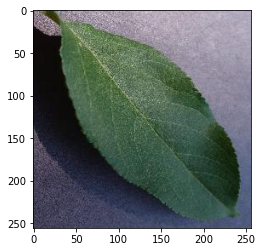

In [31]:
show_image(*train[7000])

In [32]:
# Setting seed value
random_seed = 7
torch.manual_seed(random_seed)

In [35]:
# Setting batch size and dataloaders for training and validation

# Define batch size
batch_size = 32

# Creating dataloaders for training and validation
train_loader = DataLoader(train, batch_size=batch_size, num_workers= 2, shuffle=True, pin_memory=True)
valid_loader = DataLoader(valid, batch_size=batch_size, num_workers= 2, pin_memory=True)